In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [55]:
ts=pd.read_csv('titanic_train.csv')
ts.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
ts.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [58]:
ts.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
ts.isnull().sum()
#observation
# we can ee there is null value present in the dataset  in the column Age,Cabin,Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


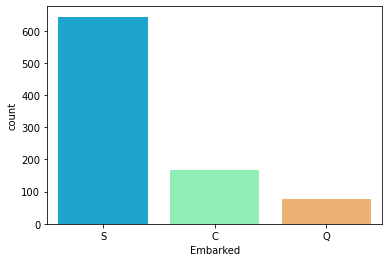

In [60]:

print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(ts['Embarked'].value_counts())
sns.countplot(x='Embarked', data=ts, palette='rainbow')
plt.show()

In [61]:
ts.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%
Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.


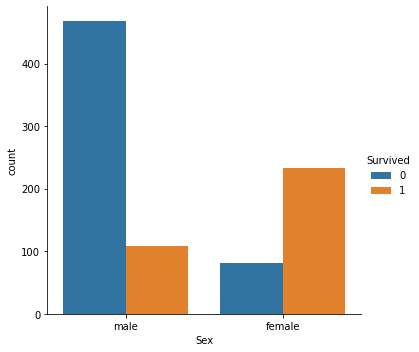

In [62]:
#count plot
print('Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%') 
print('Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.')
      
sns.catplot(x='Sex', hue='Survived',kind= 'count',data=ts)

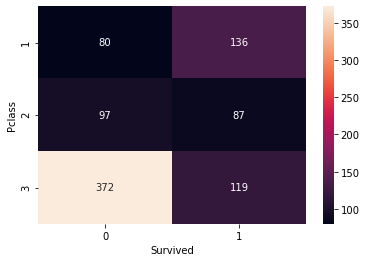

In [63]:
#group the dataset by pclass and survived and then unstack them.
#lets do the bivariate analysis between Pclass and survived

group=ts.groupby(['Pclass','Survived'])
pclass_survived=group.size().unstack()
#Heat map- color encoded 2D representation of data.
sns.heatmap(pclass_survived,annot=True,fmt='d')

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. 
Class 1 passengers have a higher survival chance compared to classes 2 and 3.
It implies that Pclass contributes a lot to a passenger’s survival rate.

In [64]:
tscor=ts.corr()
tscor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


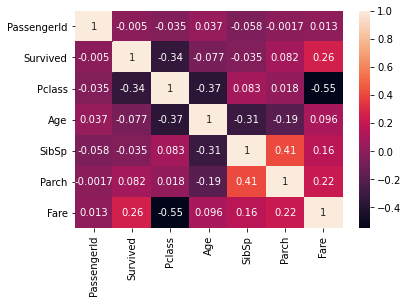

In [65]:
sns.heatmap(tscor,annot=True)

#observation

*** we can observe that parch is positively correlated with fare of about 22%
*** fare is negatively(-55%) corelated with paseenger class.
*** fare are positively related with survived paseenger we can see on heat map.
*** we can notice on heat map that Parch is highly positively corelated with SibSp with 41%

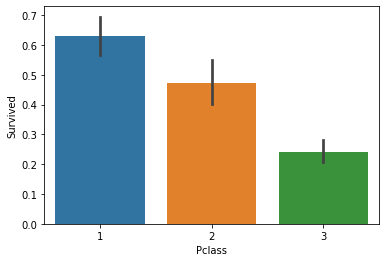

In [66]:
sns.barplot(x='Pclass', y='Survived', data=ts)
# distribution of passenger according to class (class 1 passenger has survived more compare to other class)

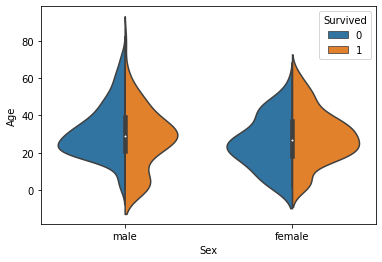

In [67]:
#voilinplot Displays distrbution of data
#across all the level of category.
#let do the bivariate analysis taking x as sex and y as age.
sns.violinplot(x='Sex',y='Age',hue='Survived',data=ts,split=True)

#observation
This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –

Good for children.
High for women in the age range 20-50.
Less for men as the age increases.

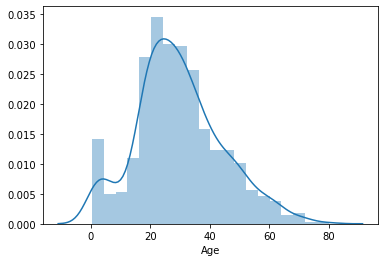

In [68]:
sns.distplot(ts['Age'])
# observation 
# we can say Age is almost normally distributed

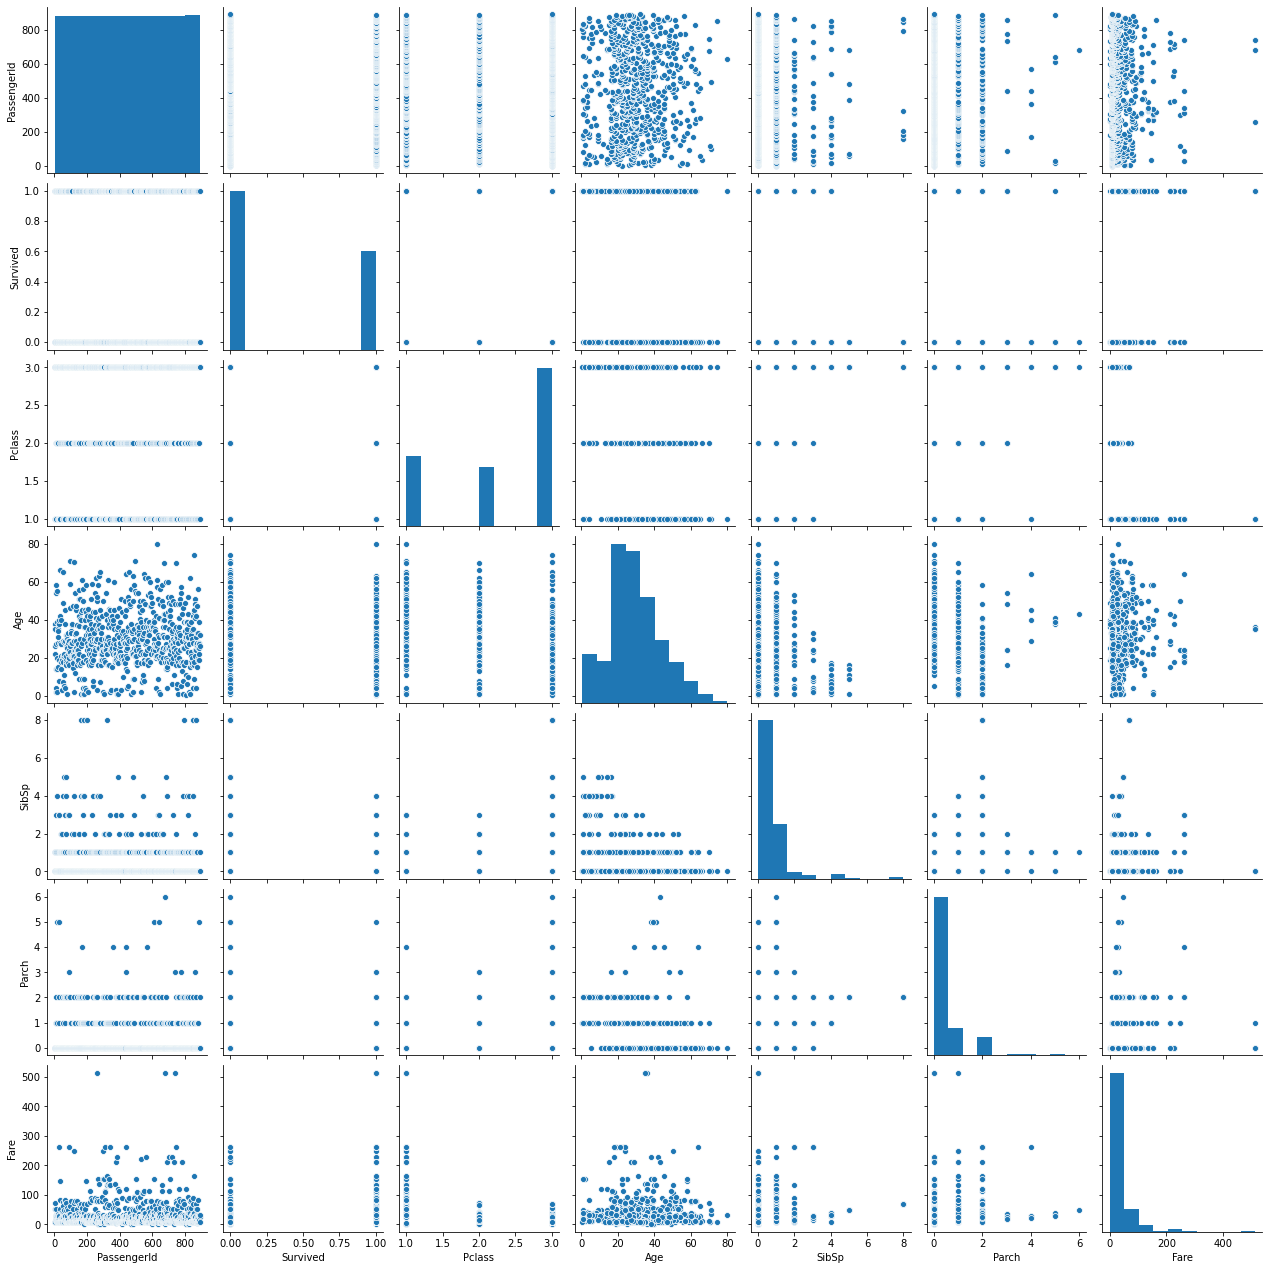

In [69]:
#lets check te pair plot
# let do multivariate analysis using pair lot by taking all column together.
sns.pairplot(ts)

In [70]:
ts

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
#we can see there is no impact of Ticket,name,cabin,passengerId so we can drop that columns
x=ts.drop(columns=['Ticket','Cabin','Name','Survived','PassengerId'])
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [72]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy='most_frequent')
x['Embarked']=imp.fit_transform(x['Embarked'].values.reshape(-1,1))
x
# we are filling the null data with the most repeted data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [73]:
# will fill all the missing age NaN value with mean of data using simple imputer
imp= SimpleImputer(strategy='mean')
x['Age']=imp.fit_transform(x['Age'].values.reshape(-1,1))
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [74]:
x.isnull().sum()
# we can find there is no null value present will proceed further for model preparation.

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#observation
we can observe that in our data set there sex and embarked column has categorical data without converting them into numeric we cant proceed further 
so we must need to convert it numeric data
*** we will use label encoder to convert categorical data to numeric.

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Sex']=le.fit_transform(x['Sex'].astype(str))
x['Embarked']=le.fit_transform(x['Embarked'].astype(str))

In [76]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [77]:
# lets segrigate target varible
y=ts['Survived']
y=pd.DataFrame(y)
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [78]:
x #is my feature varible

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [79]:
# lets check the outliers present in the data sets
from scipy.stats import zscore
z_score=abs(zscore(x))
print(x.shape)
df_x=x.loc[(z_score<3).all(axis=1)]
print(df_x.shape)
# we can see there were outliers present in the datasets

(891, 7)
(820, 7)


In [80]:
df_x.skew()

# we can observe that my featue data contians skewed data so we have to reduce our skewed data to make our data more countable 

Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

# lets treat the skewed data using 


*** log transform


*** box cox (we can only use boxcox when data is positive)


*** square root transform


In [81]:
# lets apply log transform
import numpy as np
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.log1p(df_x[col])

In [82]:
df_x.skew()
# we can observe there i no much difference

Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.292829
Parch       1.832391
Fare        0.196364
Embarked   -1.277386
dtype: float64

In [83]:
#lets use square root tranformation
import numpy as np
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.sqrt(df_x[col])

In [84]:
 df_x.skew()
# we can observe there is no much difference by sqrt transformation
# but the skewed result is better than log transform

Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.012643
Parch       1.642836
Fare        0.196364
Embarked   -1.277386
dtype: float64

In [85]:
df_x=x

In [86]:
# lets start classification process

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,auc,mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=4)



In [88]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy_score = ',accuracy_score(y_test,pred))
print('confusion_matrix =', confusion_matrix(y_test,pred))
print('classification_report',classification_report(y_test,pred))

Accuracy_score =  0.8324022346368715
confusion_matrix = [[108  11]
 [ 19  41]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.91      0.88       119
           1       0.79      0.68      0.73        60

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



Accuracy score of LogisticRegression() is:
0.8324022346368715
[[108  11]
 [ 19  41]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       119
           1       0.79      0.68      0.73        60

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

mean cross_val_score for LogisticRegression() is: 0.786761659657272
standard deviation in accuracy score for LogisticRegression() is: 0.01733439181829156
confusion_matrix for crossvalidation [[464  85]
 [105 237]]
roc_auc_score =  0.7954481792717086
AxesSubplot(0.125,0.808774;0.62x0.0712264)


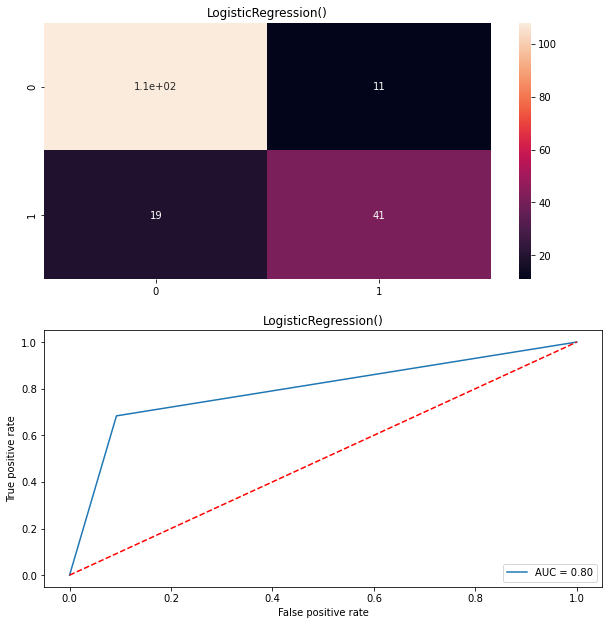





Accuracy score of GaussianNB() is:
0.8212290502793296
[[104  15]
 [ 17  43]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       119
           1       0.74      0.72      0.73        60

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179

mean cross_val_score for GaussianNB() is: 0.7912685958194715
standard deviation in accuracy score for GaussianNB() is: 0.012075695771434674
confusion_matrix for crossvalidation [[458  91]
 [ 95 247]]
roc_auc_score =  0.7953081232492997
AxesSubplot(0.125,0.808774;0.62x0.0712264)


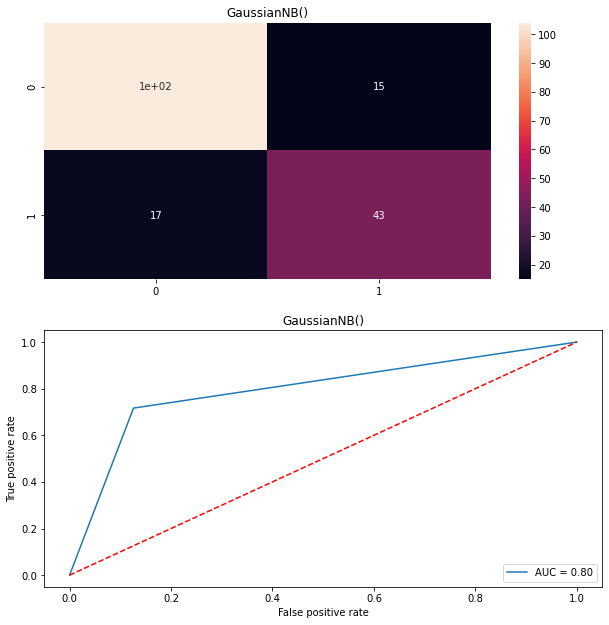





Accuracy score of SVC() is:
0.6983240223463687
[[108  11]
 [ 43  17]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       119
           1       0.61      0.28      0.39        60

    accuracy                           0.70       179
   macro avg       0.66      0.60      0.59       179
weighted avg       0.68      0.70      0.66       179

mean cross_val_score for SVC() is: 0.6757328479065972
standard deviation in accuracy score for SVC() is: 0.040160168097246485
confusion_matrix for crossvalidation [[502  47]
 [242 100]]
roc_auc_score =  0.5954481792717086
AxesSubplot(0.125,0.808774;0.62x0.0712264)


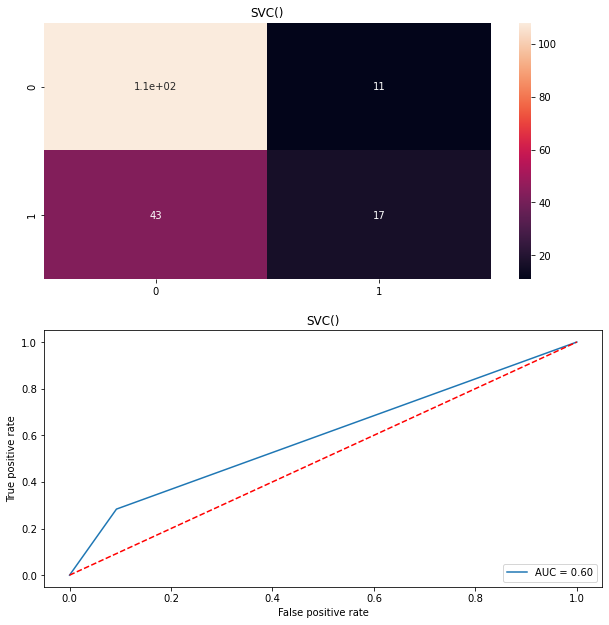





Accuracy score of DecisionTreeClassifier() is:
0.8547486033519553
[[112   7]
 [ 19  41]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       119
           1       0.85      0.68      0.76        60

    accuracy                           0.85       179
   macro avg       0.85      0.81      0.83       179
weighted avg       0.85      0.85      0.85       179

mean cross_val_score for DecisionTreeClassifier() is: 0.7710752620676669
standard deviation in accuracy score for DecisionTreeClassifier() is: 0.020853004280382868
confusion_matrix for crossvalidation [[447 102]
 [102 240]]
roc_auc_score =  0.8122549019607843
AxesSubplot(0.125,0.808774;0.62x0.0712264)


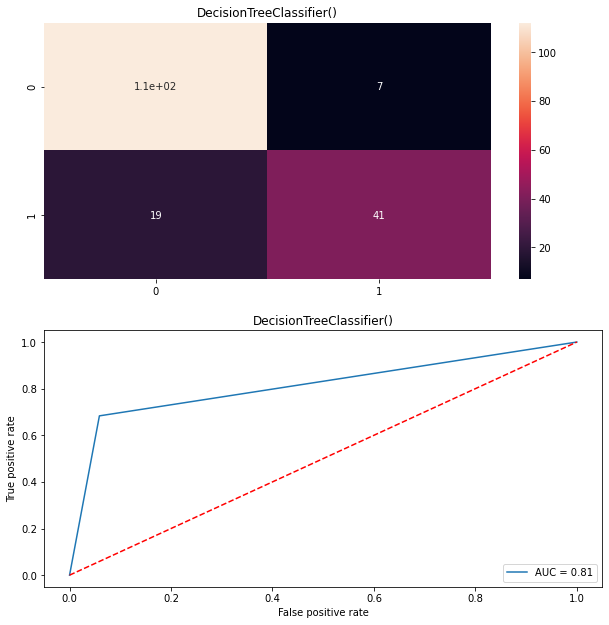





Accuracy score of KNeighborsClassifier() is:
0.7541899441340782
[[97 22]
 [22 38]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       119
           1       0.63      0.63      0.63        60

    accuracy                           0.75       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.75      0.75      0.75       179

mean cross_val_score for KNeighborsClassifier() is: 0.698141987320319
standard deviation in accuracy score for KNeighborsClassifier() is: 0.038696042787943925
confusion_matrix for crossvalidation [[437 112]
 [157 185]]
roc_auc_score =  0.7242296918767507
AxesSubplot(0.125,0.808774;0.62x0.0712264)


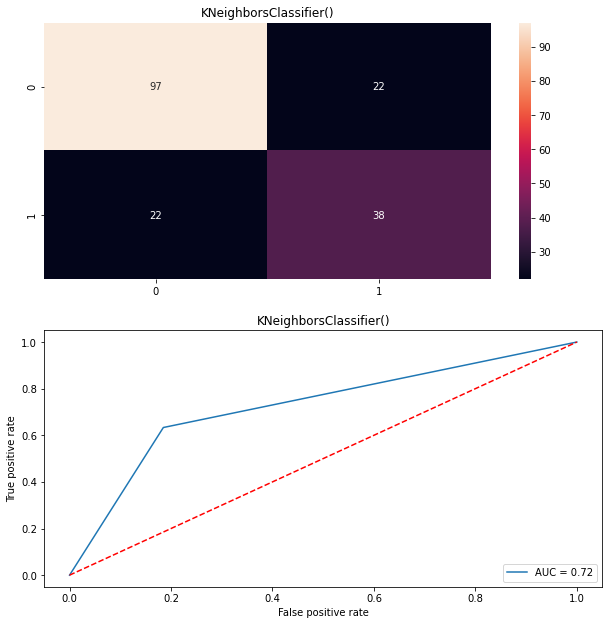

In [89]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    score=accuracy_score(y_test,predm)
    print(score)
    cm=confusion_matrix(y_test,predm)
    print(cm)
    print(classification_report(y_test,predm))
    CVS=cross_val_score(m,x,y,cv=5,scoring='accuracy').mean()
    print('mean cross_val_score for',m, 'is:',CVS)
    print('standard deviation in accuracy score for',m,'is:',cross_val_score(m,x,y,cv=5,scoring='accuracy').std())
    y_pred = cross_val_predict(m,x,y,cv=5)
    conf_mat = confusion_matrix(y,y_pred)
    print('confusion_matrix for crossvalidation',conf_mat)
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predm)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    plt.title(m)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(m)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [90]:
#lets check the other algorithm for good accuracy score

In [91]:
# lets apply grid search cv to get the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsClassifier()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x_train,y_train)
print(gknr.best_params_)
print(gknr.best_estimator_.n_neighbors)
print(gknr.best_score_)

{'n_neighbors': 7}
7
0.7177425665101722


In [92]:
knr=KNeighborsClassifier(n_neighbors=7)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print("Accuracy for Kneighbors classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for Kneighbors classifier on CV data:  0.7430167597765364


In [93]:
print('mean cross val score for KneighborsClassifier:',cross_val_score(knr,x,y,cv=5,scoring='accuracy').mean())
print('standard deviation in accuracy score for KneighborsClassifier:',cross_val_score(knr,x,y,cv=5,scoring='accuracy').std())

mean croos val score for KneighborsClassifier: 0.7049149457033457
standard deviation in accuracy score for KneighborsClassifier: 0.04757283952816299


In [94]:
# we are getting cross val score of almost 70% we can say our model is under fitting

In [95]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.7808824977839062
linear
{'C': 1, 'kernel': 'linear'}


In [96]:
svc=svm.SVC(kernel='linear',C=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy for svc classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for svc classifier on CV data:  0.8100558659217877


In [112]:
# lets find the best parameters of decision tree classifier with grid serach cv
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
grid_param ={
    'criterion':['gini','entropy']
}

gd_sr = GridSearchCV(estimator=dtc,param_grid=grid_param, scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result= gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.7710134935487047


In [115]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy for Decision tree classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for Decision tree classifier on CV data:  0.8547486033519553


In [116]:
print('mean cross val score for decision tree classifier:',cross_val_score(gd_sr,x,y,cv=5,scoring='accuracy').mean())
print('standard deviation in accuracy score for decision tree clasifier:',cross_val_score(gd_sr,x,y,cv=5,scoring='accuracy').std())

mean croos val score for decision tree classifier: 0.7632289247379325
standard deviation in accuracy score for decision tree clasifier: 0.02094014512765293


In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
#randomforestclassifier(100)-----Default
parameters={'n_estimators':[10,100,500,1000],'criterion' :['gini', 'entropy']}
rfc=GridSearchCV(estimator=rfc,param_grid=parameters,cv=5)
rfc.fit(x_train,y_train)
print(rfc.best_params_)
print(rfc.best_score_)


{'criterion': 'entropy', 'n_estimators': 100}
0.79915295971634


In [101]:
rfc1=RandomForestClassifier(random_state=42,n_estimators=100,criterion='entropy')
rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8100558659217877


In [102]:
print('mean cross val score for random forest classifier:',cross_val_score(rfc1,x,y,cv=5,scoring='accuracy').mean())
print('standard deviation in accuracy score for random forest clasifier:',cross_val_score(rfc1,x,y,cv=5,scoring='accuracy').std())

mean croos val score for random forest classifier: 0.8126169104262131
standard deviation in accuracy score for random forest clasifier: 0.036039262961452045


In [117]:
adc=AdaBoostClassifier()
parameters={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
adc=GridSearchCV(estimator=adc,param_grid=parameters,cv=5)
adc.fit(x_train,y_train)
print(adc.best_params_)
print(adc.best_score_)

{'learning_rate': 0.01, 'n_estimators': 1000}
0.801920614596671


In [125]:
adc=AdaBoostClassifier(learning_rate=0.001,n_estimators=1000)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print("Accuracy for ADA on CV data: ",accuracy_score(y_test,pred))

Accuracy for ADA on CV data:  0.8100558659217877


In [121]:
# lets save the model with Decision tree classifier
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy for Decision tree classifier on CV data: ",accuracy_score(y_test,pred))
print('\n')
print('mean cross val score for Decision tree classifier:',cross_val_score(dtc,x,y,cv=5,scoring='accuracy').mean())
print('\n')
print('standard deviation in accuracy score for decision tree clasifier:',cross_val_score(dtc,x,y,cv=5,scoring='accuracy').std())
print('\n')
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,pred)))



Accuracy for Decision tree classifier on CV data:  0.8547486033519553


mean cross val score for Decision tree classifier: 0.769945389492185


standard deviation in accuracy score for decision tree clasifier: 0.033049228856138514


RMSE is:  0.38111861230861543


In [122]:
# lets Save the model
import joblib
joblib.dump(dtc,'Titanic dataset.pkl')

['Titanic dataset.pkl']

In [124]:
# lets test the model how its working
op_dt=dtc.predict(df_x)
op_dt

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,